# Exploratory Data Analysis

> EDA Can never be the whole story, but nothing else can serve as the foundation stone.

> \- John Tukey. 

Graphical EDA presents the information in a way that is easily interpretable. It guides the actions to take for hypothesis testing:
+ The greatest value of a picture is that it forces us to notice what we never expected to see.
+ It is important to understand what you can do before you learn how to measure how well you seem to have done it.
+ If done well, graphical representations can allow for more rapid interpretation of data.


## Continuous Variables

Displaying information about continuous data, that have by definition an infinity of possible values, from finite samples presents a challenge. Histograms and Kernel Density Estimates use binning intervals to approximate continuity. The less bins (i.e. the larger the intervals), the smoother the data will be.


### Histograms & Swarm Plots

Histograms are useful to show the probability distribution of continuous variables. A common rule of thumbs for binning is to use the square root of the number of samples: this allows the right amount of smoothing. Some drawbacks: 
+ interpretation can depend on the number of bins (binning bias).
+ not all the data is displayed.

Swarm Plots can be used as an alternative.


### Empirical Probability Density Function

The Probability Density Function (PDF) is analogous to the Probability Mass Function (PMF) of discrete variables. Because a continuous variable can take an infinity of values, talking about the probability of a single value does not make sense. Instead, the area under the PDF describes the likelihood of observing a given range of values of a continuous variable (measured as the percentage of the total area).

We can approximate the PDF of a distribution based on sample data, but that requires inference about the population. Kerney Density Estimates do this inference in the form of data smoothing; results will vary when using different smoothing bandwidths.


### Boxplots

Boxplots offer a good visual summary when the data is large: they combine graphical EDA with numerical EDA & summary statistics (median, percentiles and outliers). For small datasets, swarm plots are usually enough.

_Reminder: the median is the 50th percentile of the data._


### Empirical Cumulative Distribution Function (ECDF)

The ECDF can handle complex cases in ways that histograms and swarm plots might not: it shows all the data and gives a complete picture of how the data is distributed. The X-axis represents the quantity you are measuring (petal lenght in the example below), while the Y-axis is the fraction of data points that have a value smaller than the corresponding X-value.

_Note: ECDF also show percentiles, although in a less compact form than boxplots._


In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats

sns.set()


In [54]:
# For a sorted array of size n,
# there are k values smaller than
# the kth element, or a fraction
# of k / n elements.
# This means that y = [1/n, ... k/n, ..., 1].

def ecdf(data):
    """
    returns X and Y arrays 
    for the ECDF of a 1D array of measuremetns.
    """
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n   # 1/n to 1 in equally spaced increments
    
    return x, y


In [61]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['species'] = [iris.target_names[i] for i in iris.target]
setosa_petal_length = iris_df.loc[iris_df['species'] == 'setosa', 'petal length (cm)'].to_numpy()
versicolor_petal_length = iris_df.loc[iris_df['species'] == 'versicolor', 'petal length (cm)'].to_numpy()
virginica_petal_length = iris_df.loc[iris_df['species'] == 'virginica', 'petal length (cm)'].to_numpy()


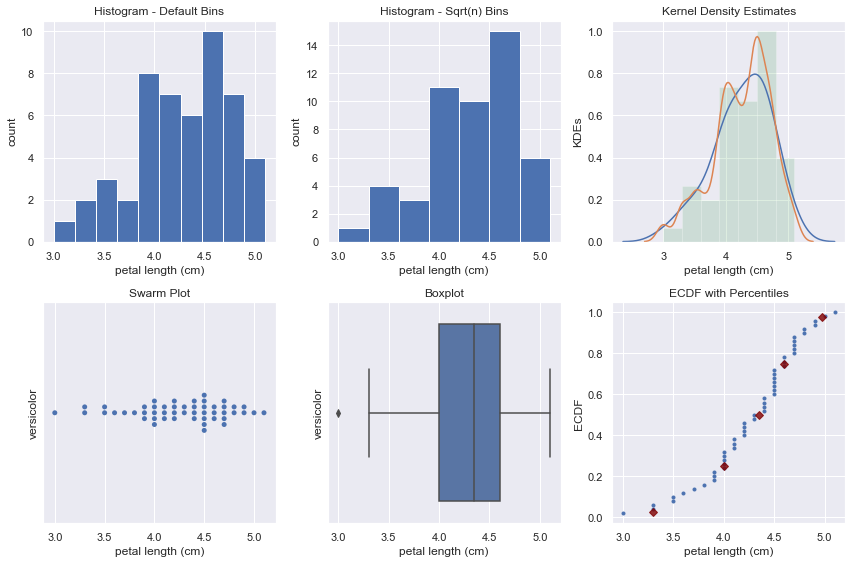

In [316]:
# fig
fig, [[ax00, ax01, ax02], [ax10, ax11, ax12]] = plt.subplots(nrows=2, ncols=3, figsize = (3 * 4, 2 * 4))

# Plot histograms, swarmplot & boxplot
_ = ax00.hist(versicolor_petal_length)
_ = ax01.hist(versicolor_petal_length, bins=int(np.sqrt(n_data)))
_ = sns.swarmplot(y='species', x='petal length (cm)', data=iris_df.loc[iris_df['species'] == 'versicolor'], ax=ax10)
_ = sns.boxplot(y='species', x='petal length (cm)', data=iris_df.loc[iris_df['species'] == 'versicolor'], ax=ax11)

# kde with several smoothing bandwidths
_ = sns.kdeplot(versicolor_petal_length, ax=ax02)
_ = sns.kdeplot(versicolor_petal_length, bw=.1, ax=ax02)
_ = ax02.hist(versicolor_petal_length, bins=int(np.sqrt(n_data)), alpha=0.2, normed=True)

# ecdf with percentiles
x_vers, y_vers = ecdf(versicolor_petal_length)
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)
_ = ax12.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
_ = ax12.plot(ptiles_vers, percentiles/100, marker='D', color='maroon', linestyle='none', alpha=0.8)

# Label axes
for ax in (ax00, ax01, ax02, ax12):
    _ = ax.set_xlabel("petal length (cm)")
    _ = ax.set_ylabel('count')

for ax in (ax10, ax11):
    _ = ax.set_yticks([])
    _ = ax.set_ylabel('versicolor', rotation=90)

_ = ax02.set_ylabel('KDEs')
_ = ax12.set_ylabel('ECDF')

# titles
_ = ax00.set_title('Histogram - Default Bins')
_ = ax01.set_title('Histogram - Sqrt(n) Bins')
_ = ax02.set_title('Kernel Density Estimates')
_ = ax10.set_title('Swarm Plot')
_ = ax11.set_title('Boxplot')
_ = ax12.set_title('ECDF with Percentiles')

plt.tight_layout()


### Comparing several distributions

Boxplots and ECDFs can also be used to compare two or more distributions. The ECDFs in the example below expose clear differences among the species. Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.

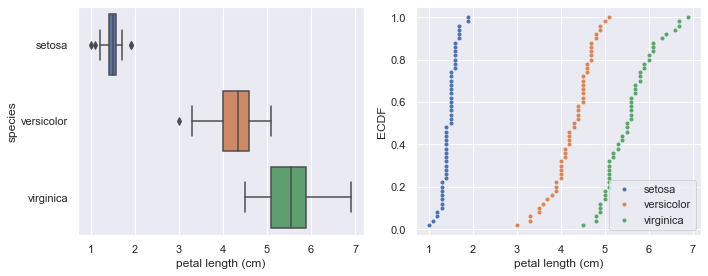

In [304]:
# fig
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 *5, 1 * 4))

# boxplots
_ = sns.boxplot(y='species', x='petal length (cm)', data=iris_df, ax=ax1)

# compared ecdfs
x_seto, y_seto = ecdf(setosa_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)
_ = ax2.plot(x_seto, y_seto, marker = '.', linestyle = 'none')
_ = ax2.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
_ = ax2.plot(x_virg, y_virg, marker = '.', linestyle = 'none')

ax2.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = ax2.set_xlabel('petal length (cm)')
_ = ax2.set_ylabel('ECDF')

plt.tight_layout()


### Summary Statistics

Histograms, swarm plots and ECDFs are provide effective summaries of data. But sometimes, we need to summarize the data even more succinctly, say in one or two numbers. The most common one for continuous data are the mean or the median.

+ mean, based on the values of the data, is heavily influenced by outliers.
+ median, based on the ranking of the values, is immune to outliers.

The spread of data is measured by the standard deviation from the mean.


In [87]:
print('median: {:0.2} - mean: {:0.2} - std: {:0.2}'.format(np.median(versicolor_petal_length), np.mean(versicolor_petal_length), np.std(versicolor_petal_length)))

median: 4.3 - mean: 4.3 - std: 0.47


___

# Statistical Inference

Probabilistic reasoning allows us to describe uncertainty. It is the process by which we go from measured data to probabilistic conclusions about what we might expect if we collected the same data again and draw more general conclusions from relatively few data or observations.

Statistical inference involves taking your data to probabilistic conclusions about what you would expect if you took even more data, and you can make decisions based on these conclusions. Data are almost never exactly the same when acquired again, and probability allows us to say how much we expect them to vary.

Given a set of data, statistical inference describe probabilistically what you might expect if those data were acquired again. Repeating measurements provide an indication of the range of values we can expect the value of interest can take.


## Approximate Data with Common Distributions

If the observed data follows a common distribution, we can use its properties to infer conclusions about unseen data.


## Discrete Variables

### Bernoulli Trials & Binomial Distribution

You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability $p$ of landing heads (success) and probability $1−p$ of landing tails (failure). 

_Note: a Bernoulli trial is a single success/failure experiment and has a Bernoulli distribution. It is a specific case ($n=1$) of the binomial distribution that considers the number of successses in n independant experiments._


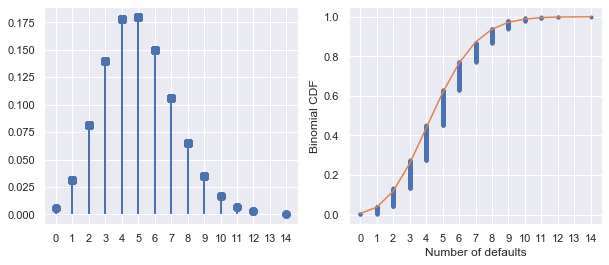

In [256]:
# A bank made 100 mortgage loans. How many defaults can we expect if their probability is 0.05?
seed = np.random.seed(42)

# equivalent to np.random.binomial(100, 0.05, size=1000)
rv = stats.binom(100, 0.05)
n_defaults = rv.rvs(size=1000)

# ecdf
x, y = ecdf(n_defaults)

# Plot the PMF and ECDF
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 * 5, 4))

_ = ax1.plot(x, rv.pmf(x), 'bo', ms=8, label='Binomial PMF')
_ = ax1.vlines(x, 0, rv.pmf(x), colors='b', lw=2)
_ = ax1.set_xticks(range(0, 15))

_ = ax2.plot(x, y, marker = '.', linestyle = 'none')
_ = ax2.plot(x, rv.cdf(x))
_ = ax2.set_xlabel('Number of defaults')
_ = ax2.set_ylabel('Binomial CDF')
_ = ax2.set_xticks(range(0, 15))


In [271]:
# Probabilit of losing money (more than 10% defaults)
# p(default >= 10) = 1 - p(defaults <= 9)
print('Probability of losing money = {:.1%}'.format(1 - rv.cdf(9)))


Probability of losing money = 2.8%


### Poisson Distribution

A Poisson process describes situations where the timing of the next event is completely independent of when the previous event happened:
+ natural births in a given hospital.
+ hit on a website during a given hour.
+ molecular collisions in a gas.
+ aviation incidents.

The number of events of a Poisson proces during a given amount of time follows a Poisson distribution of parameter lambda: the events rate, or average number of events during that amount of time.

The Poisson distribution is a limit of the Binomial distribution with low probability of success and large number of trials, i.e. for rare events. the Poisson distribution with arrival rate equal to $np$ approximates a Binomial distribution for $n$ Bernoulli trials with probability $p$ of success (with $n$ large and $p$ small). 

Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.




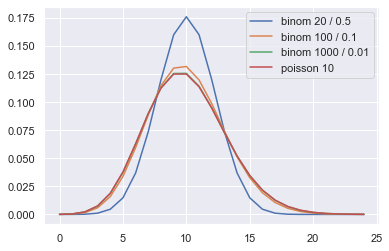

In [287]:
# Poisson vs Binomial distributions
# same mean if np = lambda
# same standard deviation when n >> p
x = range(0, 25)

_ = plt.plot(x, stats.binom.pmf(x, 20, 0.5), label='binom 20 / 0.5')
_ = plt.plot(x, stats.binom.pmf(x, 100, 0.1), label='binom 100 / 0.1')
_ = plt.plot(x, stats.binom.pmf(x, 1000, 0.01), label='binom 1000 / 0.01')
_ = plt.plot(x, stats.poisson.pmf(x, 10), label='poisson 10')

_ = plt.legend(loc='top right')


## Continuous Variables

### Normal Distribution

The Normal Distribution describes a continuous variable whose PDF is symetrical and has a single peak. It has two parameters:
+ The mean describes where the center of the peak is. 
+ The standard deviation describes how wide the peak is, or how spread out the data are.

The smaller the standard deviation, the more vertical the CDF slope around the median (which is equal to the mean).

_Note: most statistical methods assume the data is roughly normal. This assumption must always be checked first: many things that you might assume are normally distributed are actually not. In particular, outliers are extremely unlikely for normally distributed data; if your data does have extreme values, the normal distribution might not be the best description. _

_Note: We can compare the ECDF to the theoritical CDF of the normal distribution with same mean and standard deviation to assess if the data is normally distributed._


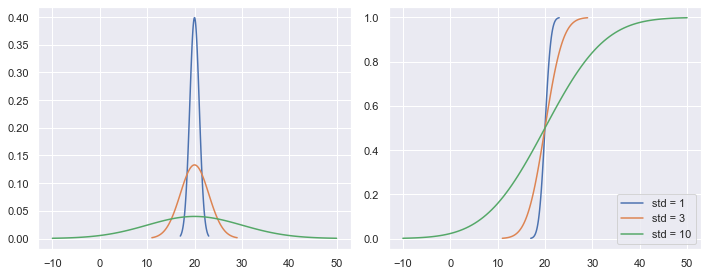

In [122]:
# fig
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 * 5, 4))

for sigma in [1, 3, 10]:

    x = np.linspace(20 - 3*sigma, 20 + 3*sigma, 100)
    _ = ax1.plot(x, stats.norm.pdf(x, 20, sigma))
    _ = ax2.plot(x, stats.norm.cdf(x, 20, sigma))

    # alternative: hacker statistics
    # sample = np.random.normal(loc=20, scale=sigma, size=10000)
    # _ = ax1.hist(sample, bins=100, normed=True, histtype='step')
    # x, y = ecdf(sample)
    # _ = ax2.plot(x, y, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')

plt.tight_layout()

### Exponential Distribution

The number of random events per unit of time can be described by a Poisson distribution. The amount of time between random events of a Poisson process follow an Exponential distribution. It has a single parameter: the mean waiting time.


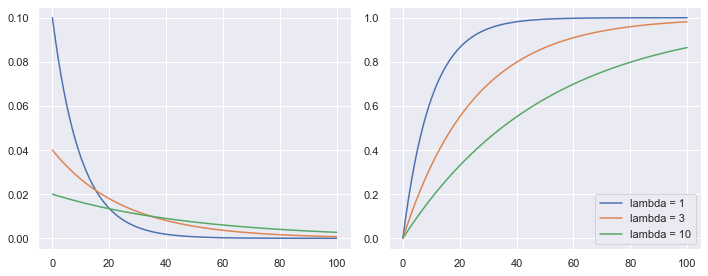

In [182]:
# fig
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 * 5, 4))

for rate in [10, 25, 50]:

    x = np.linspace(0, 100, 100)
    _ = ax1.plot(x, stats.expon.pdf(x, scale = rate))
    _ = ax2.plot(x, stats.expon.cdf(x, scale = rate))

    # alternative: hacker statistics
    # sample = np.random.normal(loc=20, scale=sigma, size=10000)
    # _ = ax1.hist(sample, bins=100, normed=True, histtype='step')
    # x, y = ecdf(sample)
    # _ = ax2.plot(x, y, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('lambda = 1', 'lambda = 3', 'lambda = 10'), loc='lower right')

plt.tight_layout()

### Use Cases

#### Normal Distribution - Belmont Stakes

The data has been scraped from the [Belmont Wikipedia page](https://en.wikipedia.org/wiki/Belmont_Stakes).
+ Secretariat ran the fastest Belmont Stakes in history in 1973. 
+ While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. 

We remove these two outliers from the data set to compute the mean and standard deviation of the Belmont winners' times. The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.


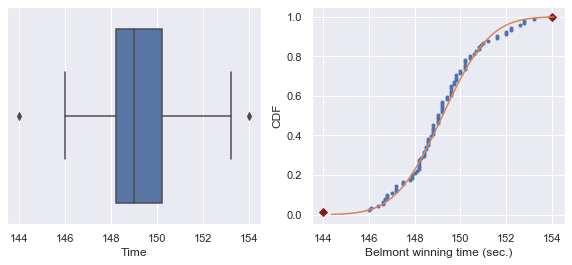

In [190]:
# load df
belmont_df = pd.read_csv('./belmont_stakes.csv')
belmont_no_outliers = belmont_df.loc[belmont_df['IsOutlier'] == 0, 'Time']
belmont_outliers = belmont_df.loc[belmont_df['IsOutlier'] == 1, 'Time'].sort_values()

# ecdf
x, y = ecdf(belmont_df['Time'])

# Compute mean and standard deviation without the outliers: mu, sigma
mu = belmont_no_outliers.mean()
sigma = belmont_no_outliers.std()
x_theor = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y_theor = stats.norm.cdf(x_theor, mu, sigma)

# Plot the CDFs and show the plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (2 * 5, 4))

_ = sns.boxplot(x=belmont_df['Time'], ax=ax1)
_ = ax2.plot(x, y, marker='.', linestyle='none')
_ = ax2.plot(belmont_outliers, y[[0, -1]], marker='D', color='maroon', linestyle='none', alpha=0.8)
_ = ax2.plot(x_theor, y_theor)
_ = ax2.set_xlabel('Belmont winning time (sec.)')
_ = ax2.set_ylabel('CDF')


If we assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat is very small: 0.06%.

_Note: the probability is so low that we need to take a million samples to be sure we get this value from the normal distribution at least once, when using hackers statistics._

In [164]:
secretariat = belmont_df.loc[belmont_df['Winner'] == 'Secretariat', 'Time'].values[0]
prob = stats.norm(mu, sigma).cdf(144)

# alternative: hacker statistics
# sample = np.random.normal(loc=mu, scale=sigma, size=1000000)
# prob = np.sum(sample <= secretariat) / 1000000

print('Probability of besting Secretariat: {:.2%}'.format(prob))


Probability of besting Secretariat: 0.063%
